In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Define the class for Lattice
class Lattice(object):
    """A user-defined data structure that stores and manipulates lattice (2D - arrays)
    """

    def __init__(self, width, height, p):
        """Constructs a board of width and height"""
        self.height = height
        self.width = width
        self.data = np.random.rand(self.height, self.width)
        self.p = p
        self.clusters = []
        self.visited = set()

        for i in range(0, height):
            for j in range(0, width):
                # if a random number is less than the probability picked, fill the lattice
                if self.data[i][j] <= self.p: 
                    self.data[i][j] = 1
                else:
                    self.data[i][j] = 0
    
    def __repr__(self):
        """Creates a 2D representation of the board object"""
        plt.imshow(self.data, cmap='gray')
        plt.show()
        return ""
    

    def clear(self):
        """clears the board, making the board only contain ' ' strings
        Return: nothing, the 2D array is changed
        """
        for i in range(0, self.height):
            for j in range(0, self.width):
                # clears the data and all of the arrays that have to do with the data
                self.data[i][j] = 0
                self.clusters = []
                self.visited.clear()
                
    def random_populate(self, new_p):
        self.data = np.random.rand(self.height, self.width)
        for i in range(0, self.height):
            for j in range(0, self.width):
                # if a random number is less than the probability picked, fill the lattice
                if self.data[i][j] <= new_p: 
                    self.data[i][j] = 1
                else:
                    self.data[i][j] = 0
        return self
    
    def color_spanning_cluster(self):
        """Colors spanning clusters """
        num_clusters, clusters, spanning = self.get_clusters()
        span_data = self.data
        if spanning != []:
            for i in range(self.height):
                for j in range(self.width):
                    if (i, j) in spanning[0]:
                        span_data[i][j] = -1
            plt.imshow(span_data, cmap='gray')
            plt.show()
        return ""

    def get_clusters(self):
        """From a lattice, returns the number of clusters, the list of clusters and the tuples for each cell that
        makes up the cluster, and any spanning cluster. """
        
        span_clusters = []
        
        # find all clusters, double counting is ok
        for i in range(self.height):
            for j in range(self.width):
                if self.data[i][j] == 1 and (i, j) not in self.visited:
                    cluster = self.finish_cluster(i,j)
                    self.clusters.append(cluster)

        # assume we are always doing squares
        for cluster in self.clusters:
            if len(cluster) >= self.height and cluster not in span_clusters:
                for cell in cluster:
                    # if the cluster has a cell at row = 0 and col = 0
                    if cell[0] == 0 and cell[1] == 0:
                        for second_cell in cluster:
                            if (second_cell[0] == self.width - 1) or (second_cell[1] == self.height - 1):
                                if cluster not in span_clusters:
                                    span_clusters.append(cluster)
                                break
                        
                    # if the cluster has a cell at col = 0
                    elif cell[0] == 0 and cell[1] != 0:
                        for second_cell in cluster:
                            if second_cell[0] == self.width - 1:
                                if cluster not in span_clusters:
                                    span_clusters.append(cluster)
                                break
                                
                                
                    # if the cluster has a cell at row = 0
                    elif cell[1] == 0 and cell[1] != 0:
                        for second_cell in cluster:
                            if second_cell[1] == self.height - 1:
                                if cluster not in span_clusters:
                                    span_clusters.append(cluster)
                                break
                                


        
        num_clusters = len(self.clusters)      
        return num_clusters, self.clusters, span_clusters
    
    def finish_cluster(self, i, j):
        """Helper function to get_clusters. finish_cluster is a recursive function that returns all adjacent
        cells to a given cell that read 1. Returns a list """
        if not (0 <= i < self.height and 0 <= j < self.width):
             return []
        if self.data[i][j] != 1 or (i, j) in self.visited:
            return []
        self.visited.add((i, j))
        res = [(i, j)]
        res += self.finish_cluster(i-1, j)
        res += self.finish_cluster(i+1, j)
        res += (self.finish_cluster(i, j+1))
        res += (self.finish_cluster(i,j-1))
        return res 




In [3]:
lattice = Lattice(10,10,0.9)

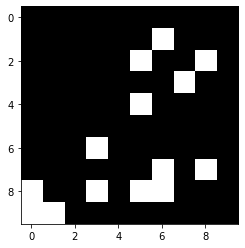

''

In [4]:
lattice.color_spanning_cluster()

In [5]:
num_clusters, clusters, spanning = lattice.get_clusters()

print(f"Number of clusters: {num_clusters}")
print()
print(f"Clusters: \n {clusters}")
print()
print(f"Number of Spanning Clusters: {len(spanning)}")
print()
print(f"Spanning Clusters: \n {spanning}")

Number of clusters: 1

Clusters: 
 [[(0, 0), (1, 0), (2, 0), (3, 0), (4, 0), (5, 0), (6, 0), (7, 0), (7, 1), (6, 1), (5, 1), (4, 1), (3, 1), (2, 1), (1, 1), (0, 1), (0, 2), (1, 2), (2, 2), (3, 2), (4, 2), (5, 2), (6, 2), (7, 2), (8, 2), (9, 2), (9, 3), (9, 4), (8, 4), (7, 4), (6, 4), (5, 4), (4, 4), (3, 4), (2, 4), (1, 4), (0, 4), (0, 5), (1, 5), (0, 6), (0, 7), (1, 7), (2, 7), (2, 6), (3, 6), (4, 6), (5, 6), (6, 6), (6, 7), (5, 7), (4, 7), (4, 8), (3, 8), (3, 9), (2, 9), (1, 9), (0, 9), (0, 8), (1, 8), (4, 9), (5, 9), (6, 9), (7, 9), (8, 9), (9, 9), (9, 8), (8, 8), (8, 7), (7, 7), (9, 7), (9, 6), (9, 5), (6, 8), (5, 8), (6, 5), (5, 5), (7, 5), (3, 5), (0, 3), (1, 3), (2, 3), (3, 3), (4, 3), (5, 3), (7, 3), (8, 1)]]

Number of Spanning Clusters: 1

Spanning Clusters: 
 [[(0, 0), (1, 0), (2, 0), (3, 0), (4, 0), (5, 0), (6, 0), (7, 0), (7, 1), (6, 1), (5, 1), (4, 1), (3, 1), (2, 1), (1, 1), (0, 1), (0, 2), (1, 2), (2, 2), (3, 2), (4, 2), (5, 2), (6, 2), (7, 2), (8, 2), (9, 2), (9, 3), (9